# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.
Measurements (2):
* SLUMP (cm)
* FLOW (cm)
Output variables (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# Loading data

In [74]:
concrete_slump_data = pd.read_csv("cement_slump.csv")
df = concrete_slump_data.copy()
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [75]:
df.shape

(103, 10)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [77]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [78]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [79]:
#Checking unique values
for i in df.columns:
    print (f"{i} {df[i].unique()}")   

Cement [273.  163.  162.  154.  147.  152.  145.  304.  148.  142.  354.  374.
 159.  153.  295.  310.  296.  305.  146.  140.  308.  298.  314.  321.
 349.  366.  274.  137.  275.  252.  165.  158.  156.  160.  291.  318.
 280.  287.  332.  326.  320.  342.  356.  309.  322.  307.  313.  143.
 278.  288.  299.  265.  166.  336.  276.  294.  149.  261.  141.1 140.1
 160.2 140.2 140.5 143.3 194.3 150.4 150.3 155.4 165.3 303.8 172.  172.8
 184.3 215.6 295.3 248.3 248.  258.8 297.1 348.7]
Slag [8.200e+01 1.490e+02 1.480e+02 1.120e+02 8.900e+01 1.390e+02 0.000e+00
 1.060e+02 1.090e+02 1.300e+02 1.160e+02 9.700e+01 1.000e+02 1.800e+02
 1.780e+02 1.280e+02 1.110e+02 1.070e+02 1.670e+02 9.900e+01 7.600e+01
 1.500e+02 1.770e+02 1.410e+02 1.460e+02 1.050e+02 1.260e+02 9.200e+01
 9.400e+01 1.360e+02 1.420e+02 1.930e+02 1.100e+02 1.240e+02 1.310e+02
 1.040e+02 8.600e+01 1.270e+02 1.340e+02 9.000e+01 7.800e+01 1.400e+00
 6.000e-01 4.200e+00 1.180e+01 3.000e-01 3.050e+01 4.480e+01 6.110e+01
 9.180e

# Data Preprocessing

### Features and target variable

In [80]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


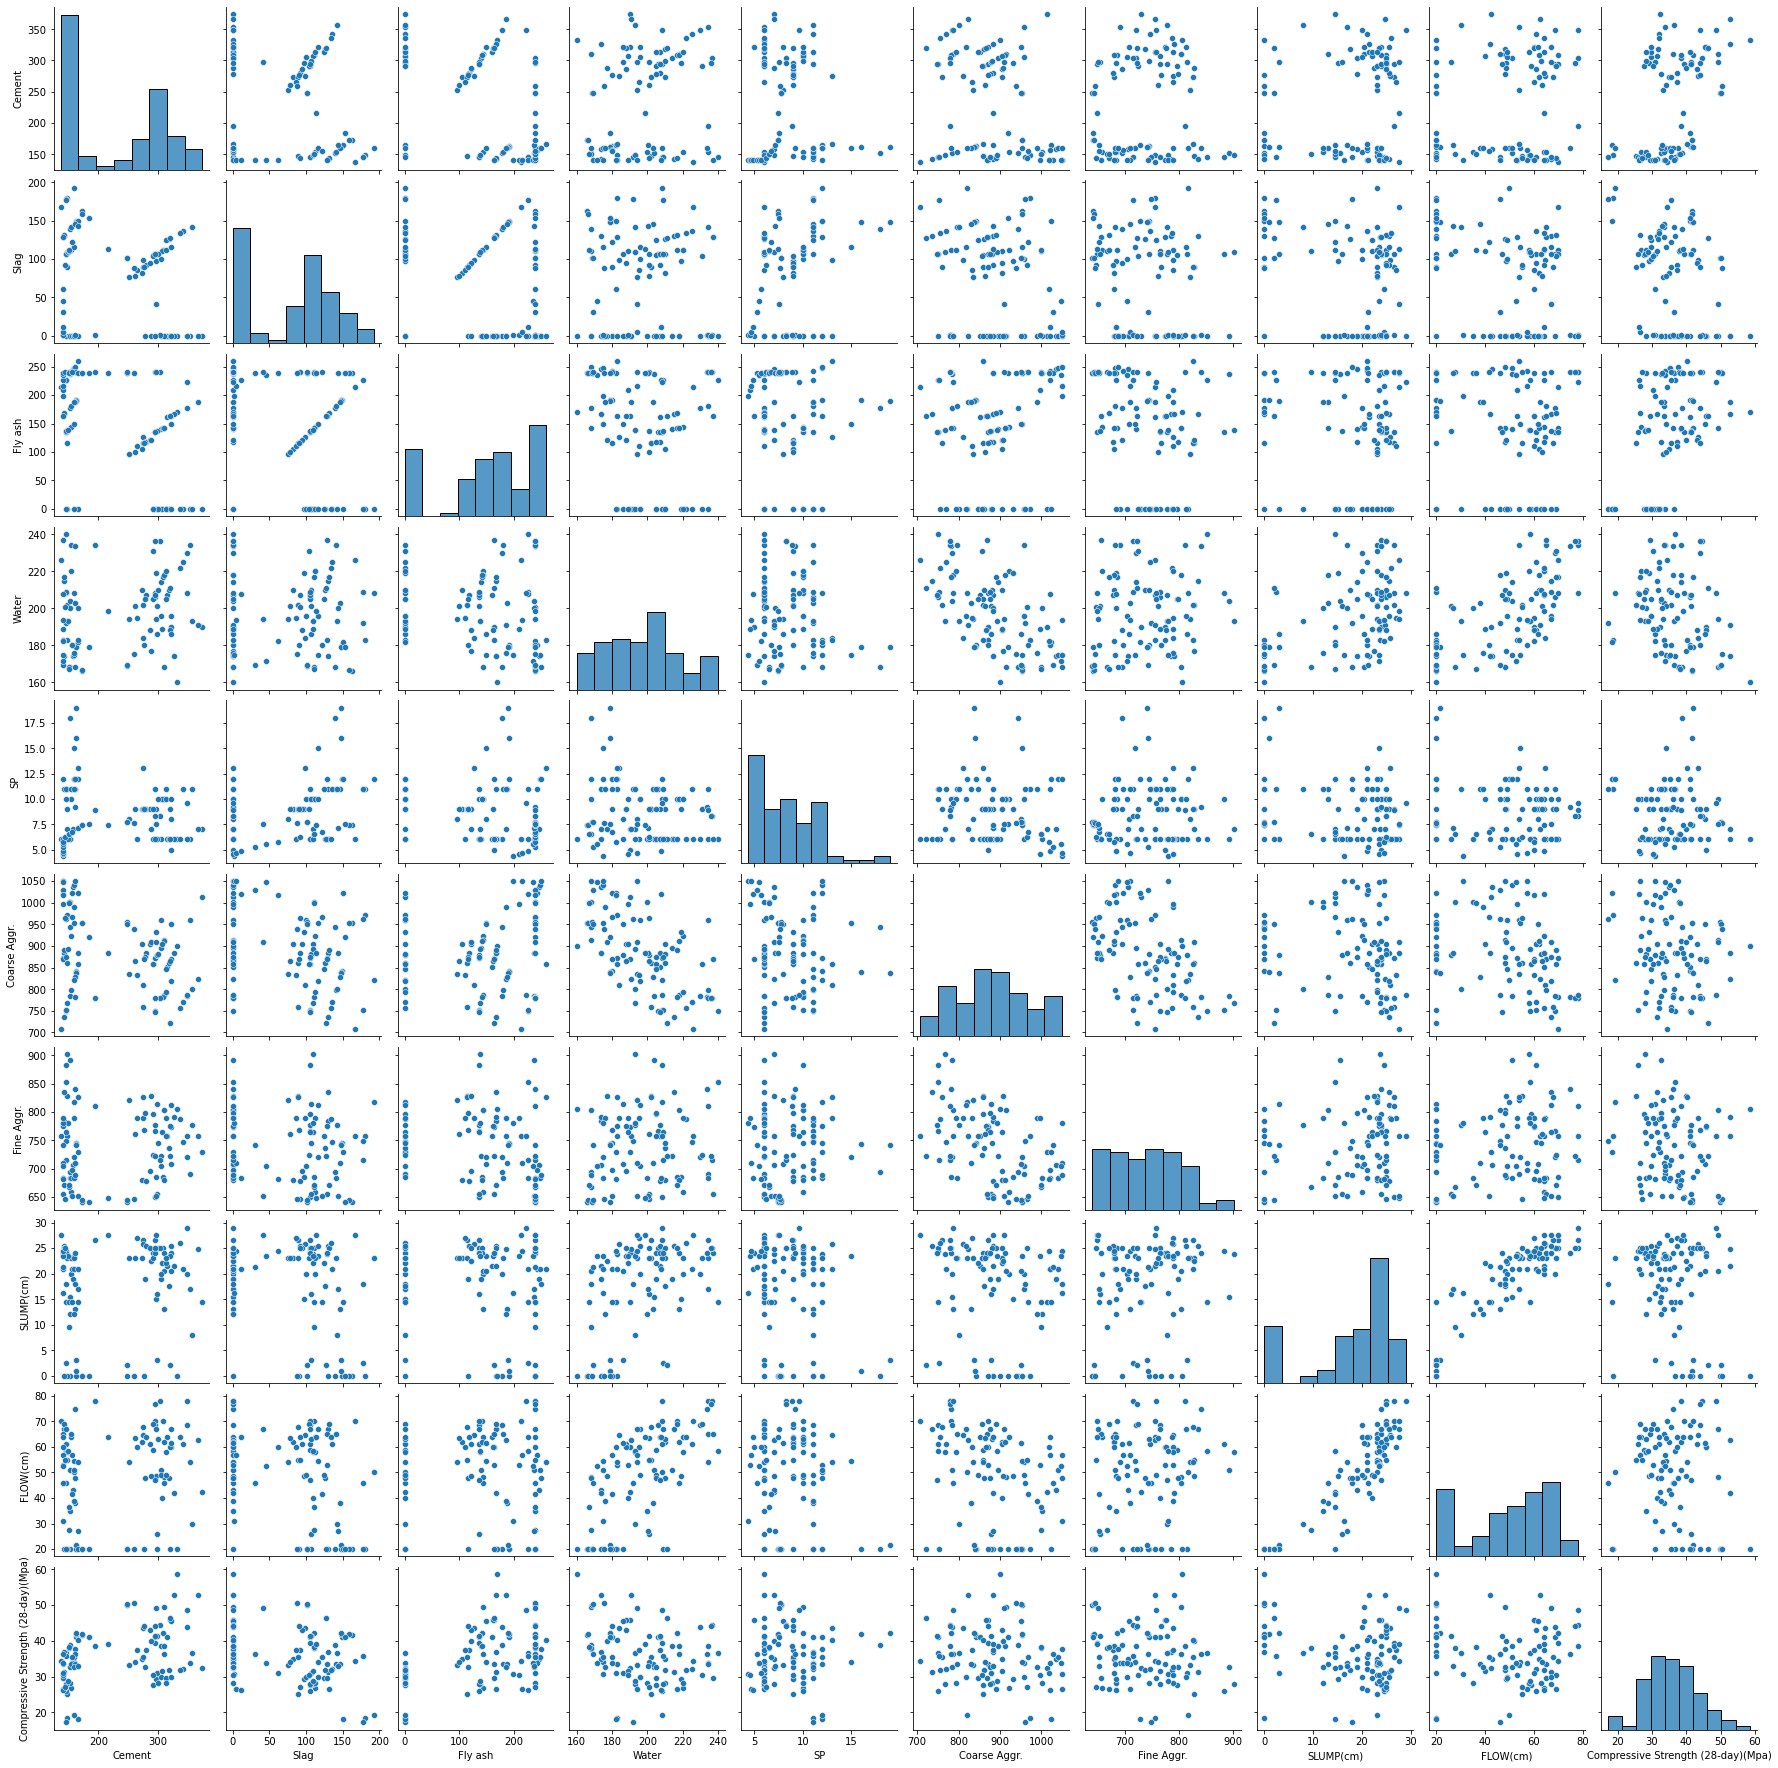

In [81]:
sns.pairplot(df);

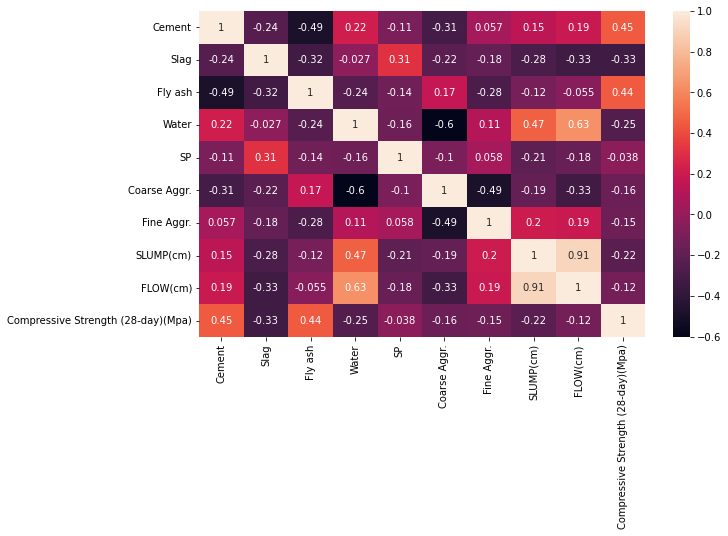

In [82]:
sns.heatmap(df.corr(), annot=True);

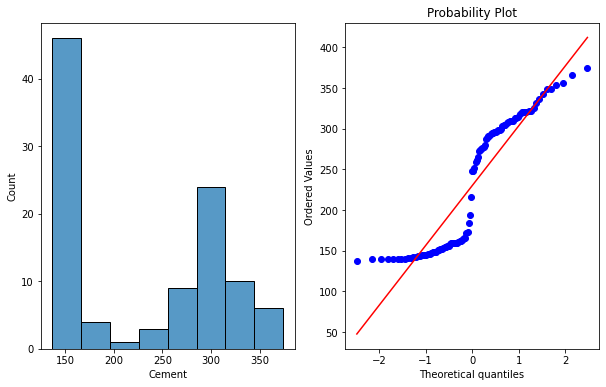

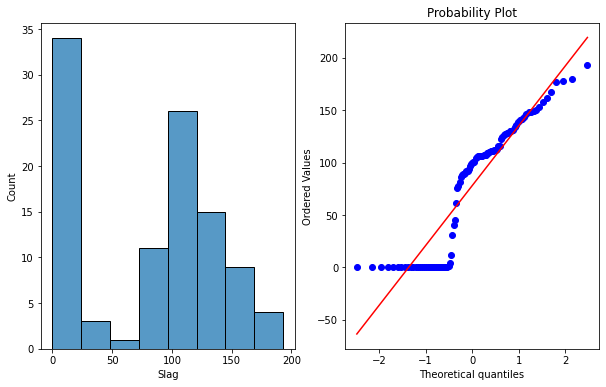

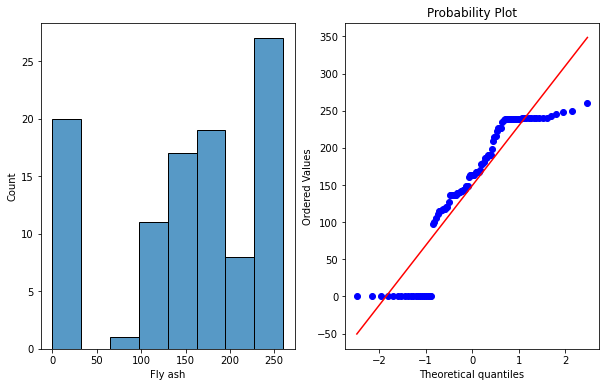

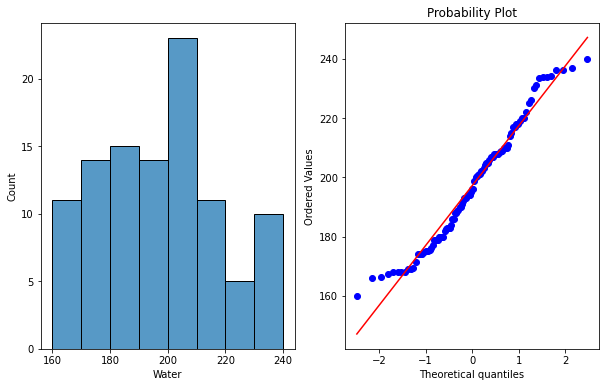

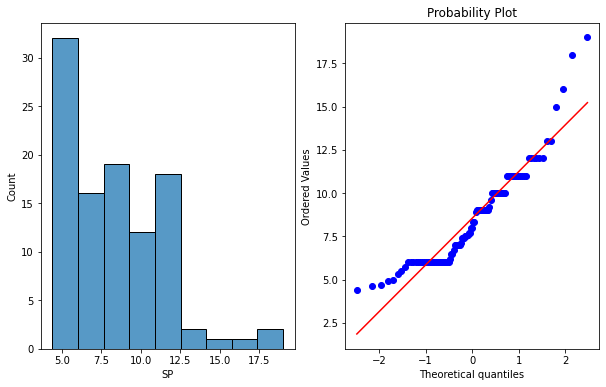

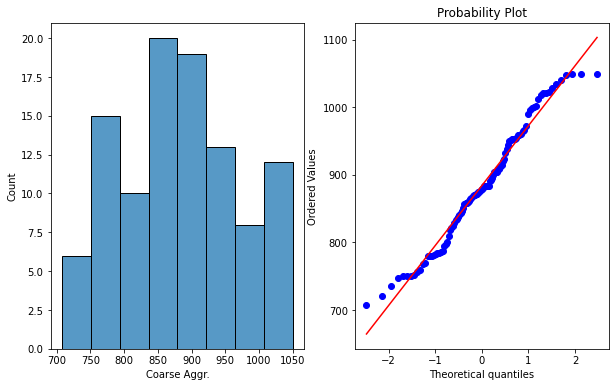

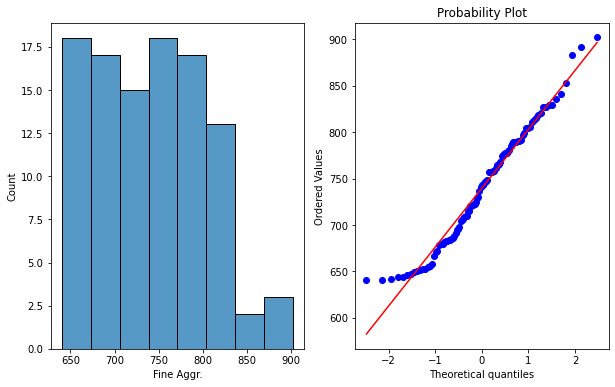

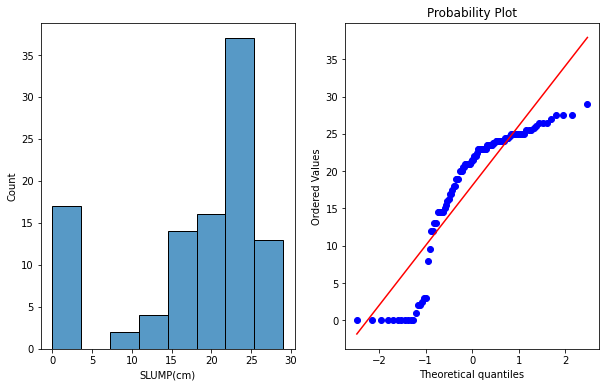

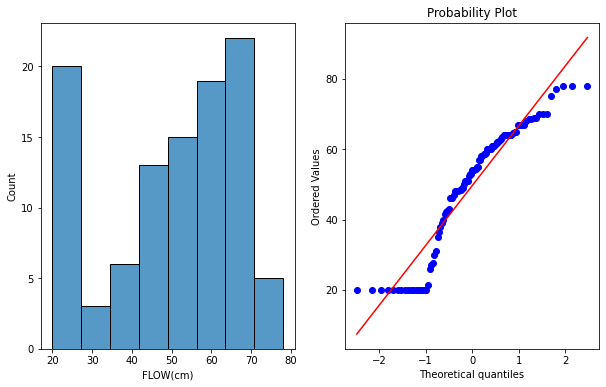

In [83]:
def check_dist(df,var):
    plt.subplot(1,2,1)
    sns.histplot(x=var, data=df)
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()
for var in df.drop(columns="Compressive Strength (28-day)(Mpa)"):
    check_dist(df, var)

In [84]:
df["Compressive Strength (28-day)(Mpa)"].corr(df["Water"])

-0.2543201492378115

In [85]:
df["Compressive Strength (28-day)(Mpa)"].corr(df["Cement"])

0.445656142563621

In [86]:
df["Compressive Strength (28-day)(Mpa)"].corr(df["Fly ash"])

0.44437968506874465

### Splitting data into training and testing

In [87]:
X = df.drop(columns ="Compressive Strength (28-day)(Mpa)")
y = df["Compressive Strength (28-day)(Mpa)"]

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [90]:
df.sample(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
69,336.000,134.000,0.000,222.000,6.000,756.000,787.000,26.000,64.000,31.900
13,354.000,0.000,0.000,234.000,6.000,959.000,691.000,17.000,54.000,33.910
68,320.000,127.000,164.000,211.000,6.000,721.000,723.000,2.000,20.000,46.360
83,140.200,30.500,239.000,169.400,5.300,1028.400,742.700,21.250,46.000,36.320
32,366.000,0.000,187.000,191.000,7.000,824.000,757.000,24.750,62.700,52.650
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
36,252.000,76.000,97.000,194.000,8.000,835.000,821.000,23.000,54.000,33.110
21,310.000,0.000,143.000,218.000,10.000,787.000,804.000,13.000,46.000,36.190
44,298.000,107.000,0.000,186.000,6.000,879.000,815.000,3.000,20.000,30.970
86,143.300,91.800,239.800,200.800,6.200,964.800,647.100,25.000,55.000,27.090


In [91]:
print("Data Frame shape     : ", df.shape)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Data Frame shape     :  (103, 10)
Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


## Scaling

In [92]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
11,148.000,109.000,139.000,193.000,7.000,768.000,902.000,23.750,58.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000
55,159.000,193.000,0.000,208.000,12.000,821.000,818.000,23.000,50.000
28,298.000,107.000,137.000,201.000,6.000,878.000,655.000,16.000,26.000
64,265.000,86.000,111.000,195.000,6.000,833.000,790.000,27.000,60.000
...,...,...,...,...,...,...,...,...,...
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
92,303.800,0.200,239.800,236.400,8.300,780.100,715.300,25.000,78.000
51,342.000,136.000,0.000,225.000,11.000,770.000,747.000,21.000,61.000


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [94]:
X_train_scaled = scaler.transform(X_train)
#X_train_scaled

In [95]:
X_test_scaled = scaler.transform(X_test)
#X_test_scaled

##  1. Model Building (Linear Regression)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()

In [98]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [100]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.999,1.716
mse,6.267,4.439
rmse,2.503,2.107


### 1.1 Interpret the model

In [101]:
model.coef_

array([ 3.73690789, -2.84833966,  3.20875858, -5.16495691, -0.05694117,
       -5.83872896, -3.18557505, -2.41794917,  1.51351431])

In [102]:
model.intercept_

35.746111111111105

In [103]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [104]:
comparing = pd.DataFrame(my_dict)
comparing.head(10)

,Actual,Pred,Residual
30,45.820,44.943,0.877
67,40.340,41.169,-0.829
62,28.290,28.563,-0.273
47,43.010,39.211,3.799
42,33.510,35.282,-1.772
40,35.660,39.457,-3.797
90,35.520,37.252,-1.732
45,31.770,31.227,0.543
10,26.020,28.770,-2.750
0,34.990,34.480,0.510


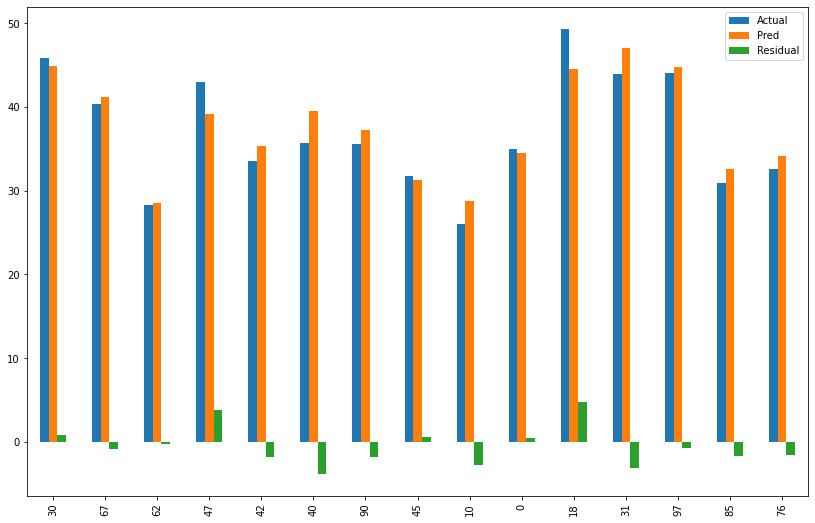

In [105]:
result_sample = comparing.head(15)
result_sample.plot(kind ="bar", figsize=(14,9))
plt.show()

### 1.2 Model Evaluation

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [107]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [108]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 0.9212363726145721
MAE 		: 1.7157819342821758
MSE 		: 4.438896026004772
RMSE 		: 2.106868772848649


# 2. Regularization

In [109]:
def color_red(val):
    if val > 0.70 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(X_train).corr().style.applymap(color_red)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
Cement,1.000000,-0.252895,-0.525581,0.163361,-0.034695,-0.279378,0.108561,0.184430,0.211376
Slag,-0.252895,1.000000,-0.304568,-0.059006,0.365425,-0.194987,-0.215341,-0.228609,-0.287148
Fly ash,-0.525581,-0.304568,1.000000,-0.252258,-0.185133,0.182814,-0.282430,-0.171120,-0.089207
Water,0.163361,-0.059006,-0.252258,1.000000,-0.163902,-0.568151,0.150772,0.536829,0.696644
SP,-0.034695,0.365425,-0.185133,-0.163902,1.000000,-0.169481,0.071194,-0.295477,-0.249056
Coarse Aggr.,-0.279378,-0.194987,0.182814,-0.568151,-0.169481,1.000000,-0.537209,-0.248334,-0.413729
Fine Aggr.,0.108561,-0.215341,-0.282430,0.150772,0.071194,-0.537209,1.000000,0.189304,0.214842
SLUMP(cm),0.184430,-0.228609,-0.171120,0.536829,-0.295477,-0.248334,0.189304,1.000000,0.892423
FLOW(cm),0.211376,-0.287148,-0.089207,0.696644,-0.249056,-0.413729,0.214842,0.892423,1.000000


In [110]:
from sklearn.model_selection import cross_validate

In [111]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [112]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001,0.003,0.870,-2.263,-7.103,-2.665
2,0.002,0.002,0.719,-2.241,-9.754,-3.123
3,0.001,0.002,0.935,-1.570,-3.284,-1.812
4,0.001,0.002,0.886,-2.510,-10.985,-3.314
5,0.001,0.002,0.880,-2.346,-7.695,-2.774


In [113]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.858
test_neg_mean_absolute_error       -2.186
test_neg_mean_squared_error        -7.764
test_neg_root_mean_squared_error   -2.738
dtype: float64

## 2.1 Ridge (Apply and evaluate)

In [114]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [115]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [116]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [117]:
ridge_cv_model.alpha_

0.42000000000000004

In [118]:
ridge_cv_model.best_score_

-2.710336898759889

In [119]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [120]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.900,0.923
mae,1.999,1.694
mse,6.267,4.357
rmse,2.503,2.087


## With Ridge

In [121]:
ridge_model = Ridge(alpha=0.42000000000000004, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.900,0.923
mae,1.999,1.694
mse,6.267,4.357
rmse,2.503,2.087


## 2.2 Lasso (Apply and evalute)

In [122]:
from sklearn.linear_model import Lasso, LassoCV

In [123]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [124]:
lasso_cv_model.alpha_

0.01

In [125]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [126]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.923
mae,1.998,1.687
mse,6.259,4.346
rmse,2.502,2.085


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [127]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV

In [128]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5,
             l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1],
             max_iter=100000, random_state=42)

In [129]:
elastic_cv_model.alpha_

0.01

In [130]:
elastic_cv_model.l1_ratio_

0.1

In [131]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [132]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


## With Grid

In [133]:
elastic_model = ElasticNet(max_iter=100000, random_state=24)

In [134]:
param_grid = {"alpha":np.linspace(0.01, 1, 20),
            "l1_ratio": np.linspace(0.1, 1, 10)}

In [135]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [136]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........alpha=0.01, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END ...........alpha=0.01, l1_ratio=0.30

[CV] END ............alpha=0.16631578947368422, l1_ratio=0.4; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.4; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.4; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.6; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.6; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.6; total time=   0.0s
[CV] END ............alpha=0.16631578947368422, l1_ratio=0.6; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.37473684210526315, l1_ratio=0.2; total time=   0.0s
[CV] END ............alpha=0.37473684210526315, l1_ratio=0.2; total time=   0.0s
[CV] END ............alpha=0.37473684210526315, l1_ratio=0.2; total time=   0.0s
[CV] END ............alpha=0.37473684210526315, l1_ratio=0.2; total time=   0.0s
[CV] END alpha=0.37473684210526315, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.37473684210526315, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.37473684210526315, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.37473684210526315, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.37473684210526315, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END ............alpha=0.37473684210526315, l1_ratio=0.4; total time=   0.0s
[CV] END ............alpha=0.37473684210526315, l1_ratio=0.4; total time=   0.0s
[CV] END ............alpha=0.37473684210526315, l1_ratio=0.4; total time=   0.0s
[CV] END

[CV] END alpha=0.5310526315789474, l1_ratio=0.7000000000000001; total time=   0.0s
[CV] END alpha=0.5310526315789474, l1_ratio=0.7000000000000001; total time=   0.0s
[CV] END alpha=0.5310526315789474, l1_ratio=0.7000000000000001; total time=   0.0s
[CV] END alpha=0.5310526315789474, l1_ratio=0.7000000000000001; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.8; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.8; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.8; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.8; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.8; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.9; total time=   0.0s
[CV] END ...........

[CV] END .............alpha=0.6873684210526316, l1_ratio=1.0; total time=   0.0s
[CV] END .............alpha=0.6873684210526316, l1_ratio=1.0; total time=   0.0s
[CV] END .............alpha=0.6873684210526316, l1_ratio=1.0; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.2; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.2; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.2; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.2; total time=   0.0s
[CV] END .............alpha=

[CV] END alpha=0.8957894736842106, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.8957894736842106, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.8957894736842106, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.8957894736842106, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8957894736842106, l1_ratio=0.5; total time=   0.0s
[CV] END .......

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000, random_state=24),
             param_grid={'alpha': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [137]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [138]:
pd.DataFrame(grid_model.cv_results_).sort_values(by="rank_test_score").head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002,0.000,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.652,-3.060,-1.837,-3.328,-2.678,-2.711,0.504,1


In [139]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [140]:
gcv = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gcv

,GridSearch_train,GridSearch_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


In [141]:
pd.concat([ls,rs, rcs, lcs, ecs, gcv], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.900,0.921,0.900,0.923,0.900,0.923,0.900,0.923,0.899,0.923,0.899,0.923
mae,1.999,1.716,1.999,1.694,1.999,1.694,1.998,1.687,2.001,1.693,2.001,1.693
mse,6.267,4.439,6.267,4.357,6.267,4.357,6.259,4.346,6.287,4.367,6.287,4.367
rmse,2.503,2.107,2.503,2.087,2.503,2.087,2.502,2.085,2.507,2.090,2.507,2.090


In [152]:
final = pd.concat([ls,rs, rcs, lcs, ecs, gcv], axis = 1).T
final.sort_values(by=['R2','rmse','mse','mae'], ascending=False)

,R2,mae,mse,rmse
lasso_cv_test,0.923,1.687,4.346,2.085
ridge_test,0.923,1.694,4.357,2.087
ridge_cv_test,0.923,1.694,4.357,2.087
elastic_cv_test,0.923,1.693,4.367,2.090
GridSearch_test,0.923,1.693,4.367,2.090
linear_test,0.921,1.716,4.439,2.107
lasso_cv_train,0.900,1.998,6.259,2.502
linear_train,0.900,1.999,6.267,2.503
ridge_train,0.900,1.999,6.267,2.503
ridge_cv_train,0.900,1.999,6.267,2.503
